<a href="https://colab.research.google.com/github/rashimittal/Loan-Prediction-Model/blob/main/LOAN_PREDICTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [422]:
# Data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns

# classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [423]:
# loading training data
# from google.colab import files
# file_train = files.upload()
loan_train = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [424]:
# loading testing data
# from google.colab import files
# file_test = files.upload()
loan_test = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')


In [425]:
#preview data

print("----------Testing Data----------")
loan_test.head()

----------Testing Data----------


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [426]:

print("----------Testing Data----------")
loan_test.head()

----------Testing Data----------


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [427]:
# Copy the data, using the copy to create some visualization of categorical data using a loop

loan_train_cc = loan_train.copy()

In [428]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [429]:
loan_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [430]:
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [431]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [432]:
len(loan_train)

614

In [433]:
len(loan_test)

367

In [434]:
#check if we have missing data in training data
loan_train.isna().values.any()

True

In [435]:
#check if we have missing data in testing data
loan_test.isna().values.any()

True

<Figure size 720x432 with 0 Axes>

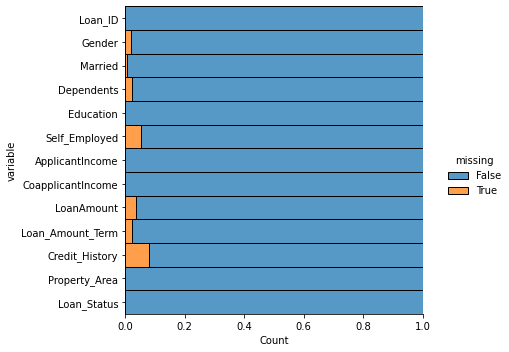

In [436]:
#visualizing the missing data in the training data

import seaborn as sns

plt.figure(figsize=(10,6))
sns.displot(
    data=loan_train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

plt.show()

In [437]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [438]:
#for training data
# We'll do a forward fill here, so, we get only 1 or 0 to fill the missing data
loan_train['Credit_History'].fillna(method='ffill', inplace=True)

# We'll fill this column using the median of the values
median_loan = loan_train['Loan_Amount_Term'].median()
loan_train['Loan_Amount_Term'].fillna((median_loan), inplace=True)

median_loan_amount = loan_train['LoanAmount'].median()
loan_train['LoanAmount'].fillna((median_loan_amount), inplace=True)



In [439]:
# Count the values to know which occurs most frequently
loan_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [440]:
#Fill with mode
loan_train['Self_Employed'].fillna('No', inplace=True)

loan_train['Dependents'].fillna(0, inplace=True)

In [441]:
loan_train['Married'].mode()

0    Yes
dtype: object

In [442]:
# fill with mode
loan_train['Married'].fillna('Yes', inplace=True)

In [443]:
loan_train['Gender'].mode()

0    Male
dtype: object

In [444]:
# fill with mode
loan_train['Gender'].fillna('Male', inplace=True)

In [445]:
# running a quick check
loan_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [446]:
# A preview of missing data in the testing set

loan_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [447]:
# fill in credit history
loan_test['Credit_History'].fillna(method='ffill', inplace=True)

# fill in loan amount term
median_loan_test = loan_test['Loan_Amount_Term'].median()
loan_test['Loan_Amount_Term'].fillna((median_loan_test), inplace=True)

# fill in loan amount
median_loan_amount_test = loan_test['LoanAmount'].median()
loan_test['LoanAmount'].fillna((median_loan_amount_test), inplace=True)

# fill in self employed
loan_test['Self_Employed'].fillna('No', inplace=True)

# fill in dependents
loan_test['Dependents'].fillna(0, inplace=True)

# fill in gender
loan_test['Gender'].fillna('Male', inplace=True)


In [448]:
loan_test.isna().values.any()

False

In [449]:
loan_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [450]:
#checking for duplicate values in training data
loan_train.duplicated().values.any()

False

In [451]:
#checking for duplicate values in testing data
loan_test.duplicated().values.any()

False

In [452]:
# Let's preview the data again

loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


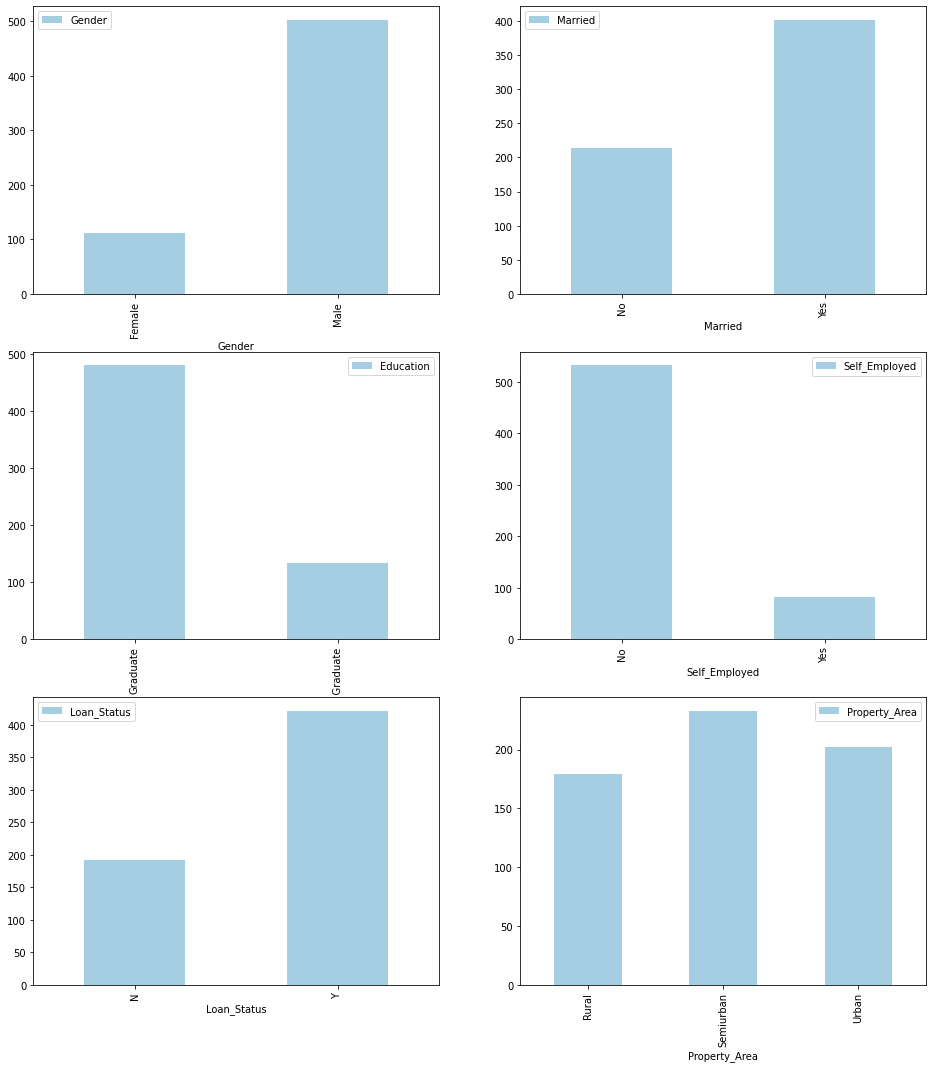

In [453]:
# Bar charts to get a high level view of categorical data

fig, ax = plt.subplots(3, 2, figsize=(16, 18))

loan_train.groupby(['Gender'])[['Gender']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))), ax=ax[0,0])
loan_train.groupby(['Married'])[['Married']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))), ax=ax[0,1])
loan_train.groupby(['Education'])[['Education']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))), ax=ax[1,0])
loan_train.groupby(['Self_Employed'])[['Self_Employed']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))), ax=ax[1,1])

loan_train.groupby(['Loan_Status'])[['Loan_Status']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))),ax=ax[2,0])
loan_train.groupby(['Property_Area'])[['Property_Area']].count().plot.bar(
    color=plt.cm.Paired(np.arange(len(loan_train))),ax=ax[2,1])

plt.show()

In [454]:
# Here, I pass all categorical columns into a list

categorical_columns = loan_train_cc.select_dtypes('object').columns.to_list()

In [455]:
categorical_columns[1:]

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

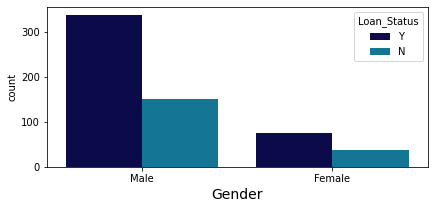

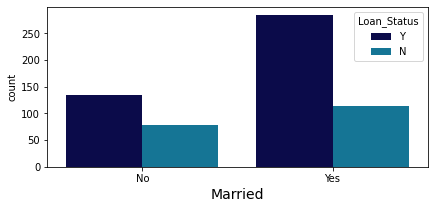

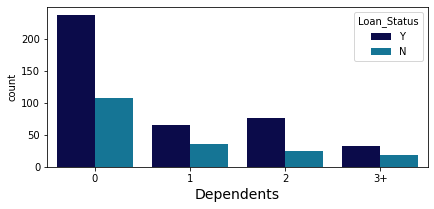

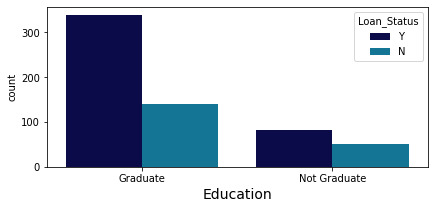

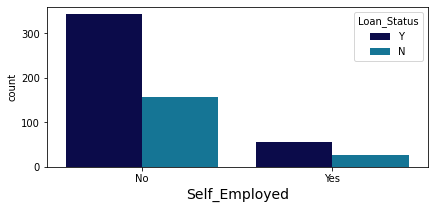

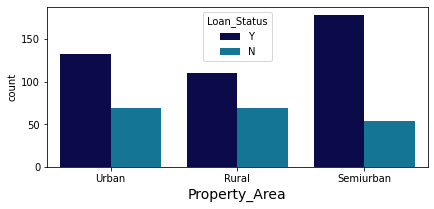

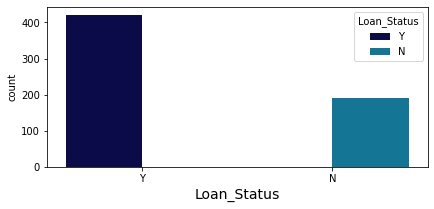

In [456]:
for i in categorical_columns[1:]: 
    plt.figure(figsize=(15,10))
    plt.subplot(3,2,1)
    sns.countplot(x=i ,hue='Loan_Status', data=loan_train_cc, palette='ocean')
    plt.xlabel(i, fontsize=14)

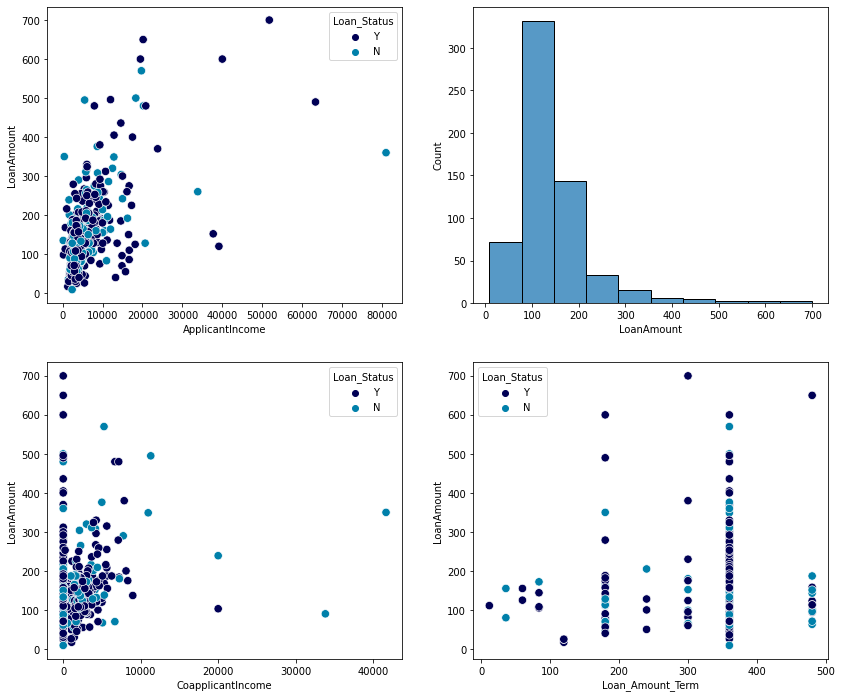

In [457]:
#Plot4- Scatterplot
fig, ax = plt.subplots(2,2, figsize=(14,12))

sns.scatterplot(data=loan_train,x="ApplicantIncome", y="LoanAmount",s=70, hue="Loan_Status", palette='ocean',ax=ax[0,0])
sns.histplot(loan_train, x=loan_train['LoanAmount'], bins=10, ax=ax[0,1])
sns.scatterplot(data=loan_train,x='CoapplicantIncome', y='LoanAmount',s=70, hue='Loan_Status',palette='ocean', ax=ax[1,0])
sns.scatterplot(data=loan_train,x='Loan_Amount_Term', y='LoanAmount', s=70, hue='Loan_Status',palette='ocean', ax=ax[1,1])

plt.show();

In [458]:
loan_train.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.020183
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.009391
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.018454
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.022967
Credit_History,-0.020183,0.009391,-0.018454,-0.022967,1.000000


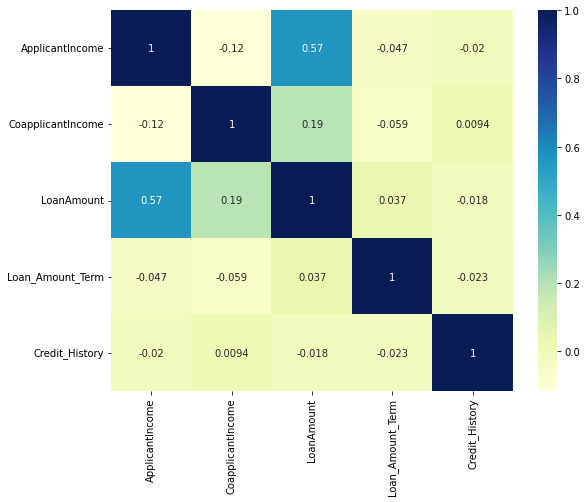

In [459]:
# Let's plot correlation overview of the variables.

fig, ax = plt.subplots(figsize=(9, 7))
correlations = loan_train.corr()
  
# plotting correlation heatmap
dataplot = sns.heatmap(correlations, cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [460]:
# Let's take another preview of the data
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [461]:
#first identify all categorical columns & pass into a variable
objectlist_train = loan_train.select_dtypes(include = "object").columns


# Then Label Encoding for object to numeric conversion

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectlist_train:
    loan_train[feature] = le.fit_transform(loan_train[feature].astype(str))

print (loan_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 62.5 KB
None


In [462]:
# Now, repeat the same process to encode the test data

objectlist_test = loan_test.select_dtypes(include='object').columns

for feature in objectlist_test:
    loan_test[feature] = le.fit_transform(loan_test[feature].astype(str))

print (loan_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    int64  
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 34.5 KB
None


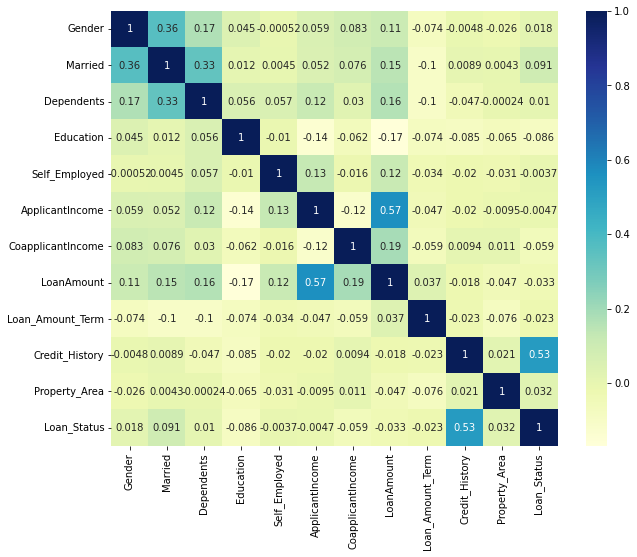

In [463]:
fig, ax = plt.subplots(figsize=(10, 8))
correlations_ML = loan_train.iloc[:,1:].corr() # filer out the Loan_ID column as it is not relevant
sns.heatmap(correlations_ML, cmap="YlGnBu", annot=True)
plt.show()

In [464]:
x = loan_train.iloc[:,1:].drop('Loan_Status', axis=1) # drop loan_status column because that is what we are predicting
y = loan_train['Loan_Status']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=0)

In [465]:
#Decision Tree Classifier
df_model = DecisionTreeClassifier()
df_model.fit(train_x, train_y)
predict_y = df_model.predict(test_x)
print(classification_report(test_y, predict_y))
print("Accuracy:", accuracy_score(predict_y, test_y))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        51
           1       0.84      0.84      0.84       134

    accuracy                           0.77       185
   macro avg       0.72      0.72      0.72       185
weighted avg       0.77      0.77      0.77       185

Accuracy: 0.772972972972973


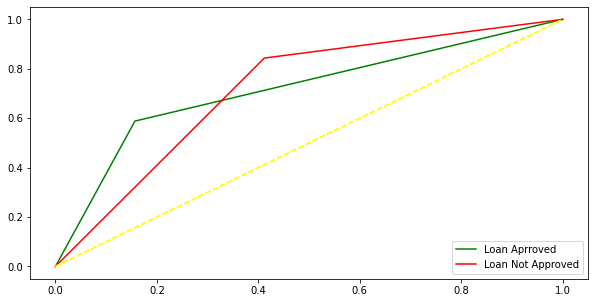

ROC AUC score :  0.7157594381035997


In [466]:
#ROC curve for Deceision Tree Model
from sklearn import metrics

fpr={}
tpr={}
thresh={}
y_proba=df_model.predict_proba(test_x)
for i in range(2):
    fpr[i],tpr[i],thresh[i]= metrics.roc_curve(test_y,y_proba[:,i],pos_label=i)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(fpr[0],tpr[0],linestyle='-',color='green',label='Loan Aprroved')
plt.plot(fpr[1],tpr[1],linestyle='-',color='red',label='Loan Not Approved')
plt.plot([[0,0],[1,1]],linestyle='--',color='yellow')
plt.legend(loc='lower right')
plt.show()
auc_score = metrics.roc_auc_score(test_y,y_proba[:,i])
print('ROC AUC score : ',auc_score)

In [467]:
#Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_x, train_y)
predict_y_2 = rf_model.predict(test_x)
print(classification_report(test_y, predict_y_2))
print("Accuracy:", accuracy_score(predict_y_2, test_y))

              precision    recall  f1-score   support

           0       0.74      0.51      0.60        51
           1       0.83      0.93      0.88       134

    accuracy                           0.82       185
   macro avg       0.79      0.72      0.74       185
weighted avg       0.81      0.82      0.80       185

Accuracy: 0.8162162162162162


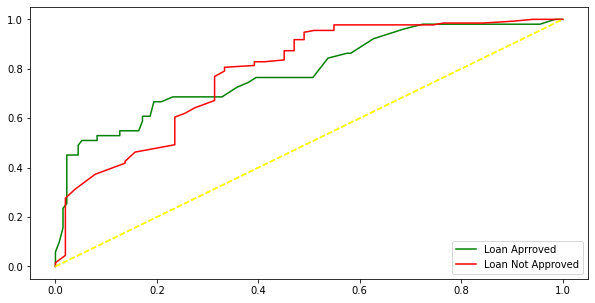

ROC AUC score :  0.7866549604916593


In [468]:
#ROC curve for Random Forest Classifier
from sklearn import metrics

fpr={}
tpr={}
thresh={}
y_proba=rf_model.predict_proba(test_x)
for i in range(2):
    fpr[i],tpr[i],thresh[i]= metrics.roc_curve(test_y,y_proba[:,i],pos_label=i)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(fpr[0],tpr[0],linestyle='-',color='green',label='Loan Aprroved')
plt.plot(fpr[1],tpr[1],linestyle='-',color='red',label='Loan Not Approved')
plt.plot([[0,0],[1,1]],linestyle='--',color='yellow')
plt.legend(loc='lower right')
plt.show()
auc_score = metrics.roc_auc_score(test_y,y_proba[:,i])
print('ROC AUC score : ',auc_score)

In [469]:
#Logistic regression
lr_model = LogisticRegression(solver='lbfgs', multi_class='auto')
lr_model.fit(train_x, train_y)
predict_y_3 = lr_model.predict(test_x)
print(classification_report(test_y, predict_y_3))
print("Accuracy:", accuracy_score(predict_y_3, test_y))

              precision    recall  f1-score   support

           0       0.89      0.49      0.63        51
           1       0.83      0.98      0.90       134

    accuracy                           0.84       185
   macro avg       0.86      0.73      0.77       185
weighted avg       0.85      0.84      0.83       185

Accuracy: 0.8432432432432433


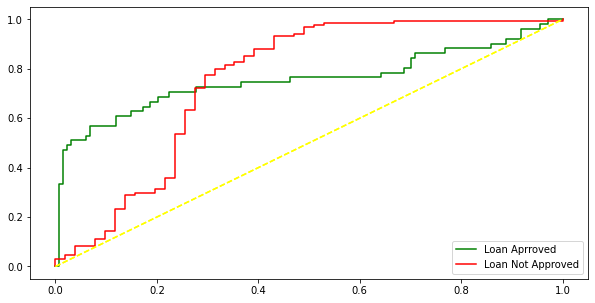

ROC AUC score :  0.7554872695346795


In [470]:
#ROC curve for Logistic Regression Classifier
from sklearn import metrics

fpr={}
tpr={}
thresh={}
y_proba=lr_model.predict_proba(test_x)
for i in range(2):
    fpr[i],tpr[i],thresh[i]= metrics.roc_curve(test_y,y_proba[:,i],pos_label=i)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(fpr[0],tpr[0],linestyle='-',color='green',label='Loan Aprroved')
plt.plot(fpr[1],tpr[1],linestyle='-',color='red',label='Loan Not Approved')
plt.plot([[0,0],[1,1]],linestyle='--',color='yellow')
plt.legend(loc='lower right')
plt.show()
auc_score = metrics.roc_auc_score(test_y,y_proba[:,i])
print('ROC AUC score : ',auc_score)